# BLOB DETECTION

In [1]:
!ls

Blob Detection and Masking.ipynb  __pycache__
Gaussian blur_1.png               adjustedimage.png
IM15UD.dcm                        adjustedimage1.dcm
IM15UD.jpg                        adjustedimage1.png
IM19OP.png                        dcm.png
IM19UD.dcm                        fig1.png
IM21UD.dcm                        imadjust_try.ipynb
IM25OP.png                        img15_blur.dcm
IM25UD.dcm                        img1_1.DCM
IM3                               img2_1.DCM
IM31UD.dcm                        llf.py
IM39UD.dcm                        op1.png
IM_ADJUST_ALTERNATIVE_MANSI.ipynb out.dcm
ImAdjust_alt.py                   task1_read.m
Imadjust_python.ipynb             task1_w1.py
Imadjust_python.py                untitled0.py
Untitled.ipynb                    untitled1.py
Untitled1.ipynb


Blob Detection and Masking.ipynb  __pycache__
Gaussian blur_1.png               adjustedimage.png
IM15UD.dcm                        adjustedimage1.dcm
IM15UD.jpg                        adjustedimage1.png
IM19OP.png                        dcm.png
IM19UD.dcm                        fig1.png
IM21UD.dcm                        imadjust_try.ipynb
IM25OP.png                        img15_blur.dcm
IM25UD.dcm                        img1_1.DCM
IM3                               img2_1.DCM
IM31UD.dcm                        llf.py
IM39UD.dcm                        op1.png
IM_ADJUST_ALTERNATIVE_MANSI.ipynb out.dcm
ImAdjust_alt.py                   task1_read.m
Imadjust_python.ipynb             task1_w1.py
Imadjust_python.py                untitled0.py
Untitled.ipynb                    untitled1.py
Untitled1.ipynb


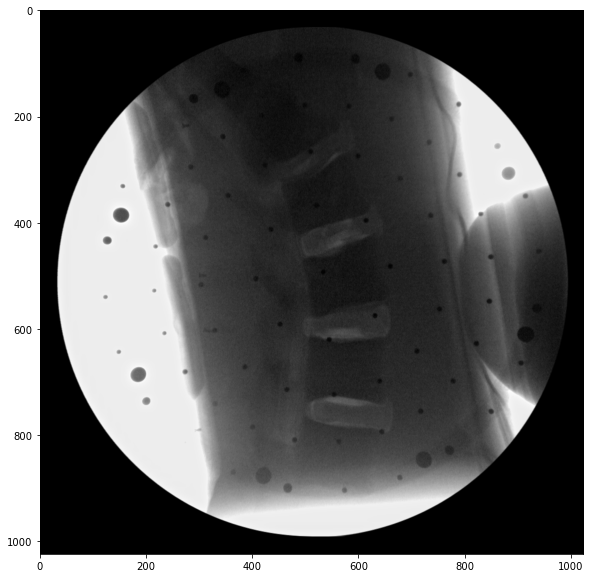

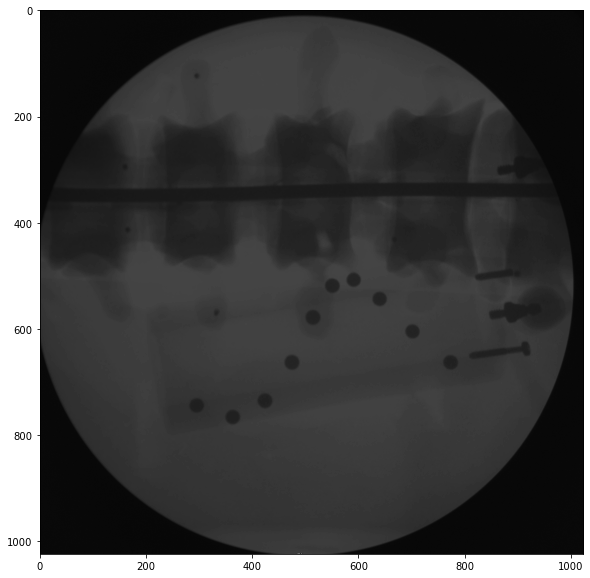

uint16
(1024, 1024)
uint16
(1024, 1024)


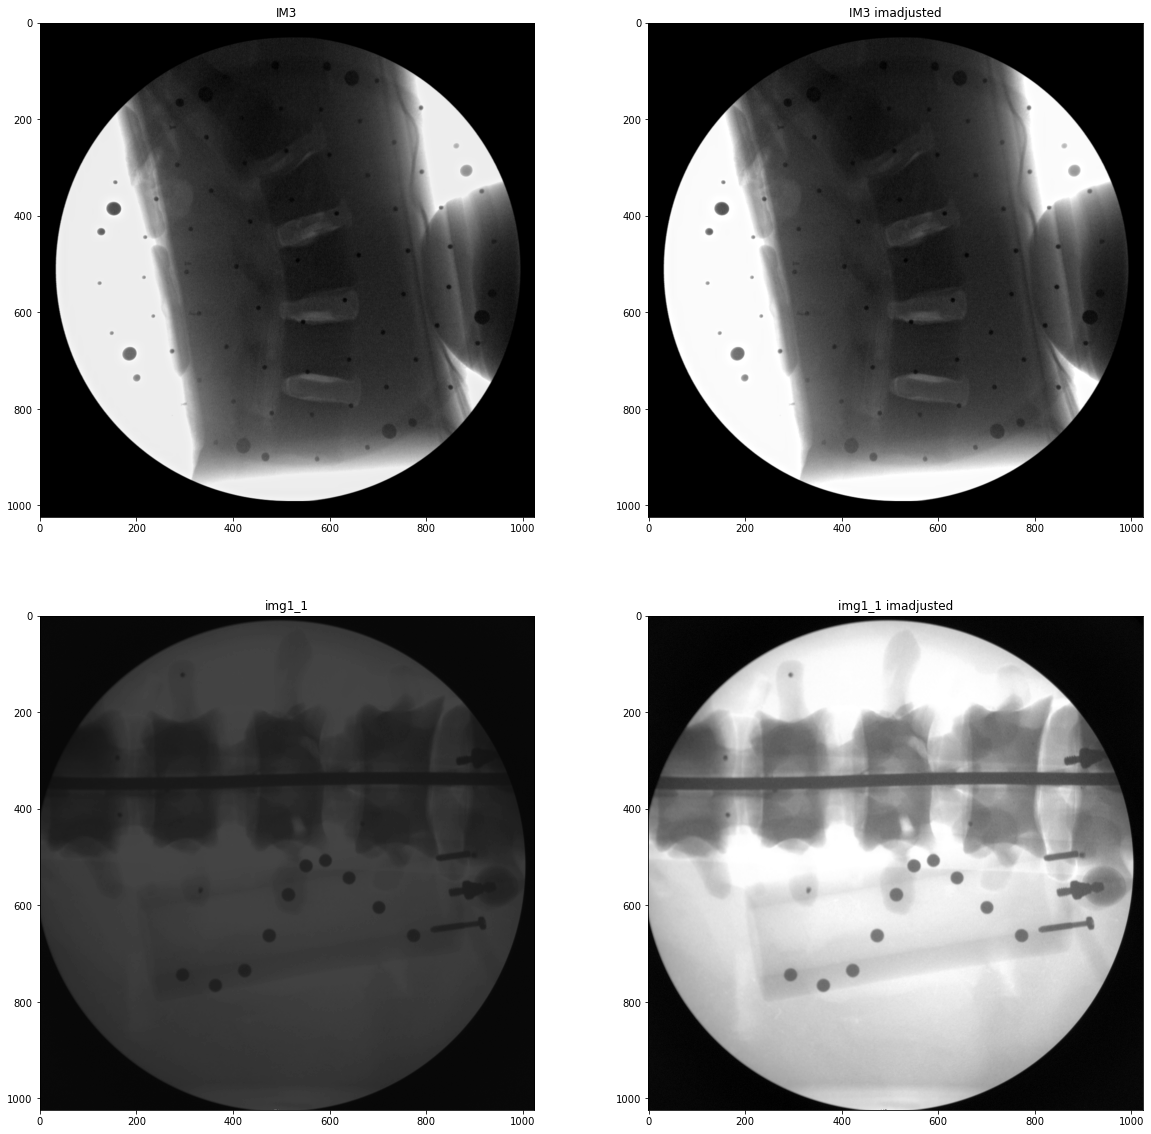

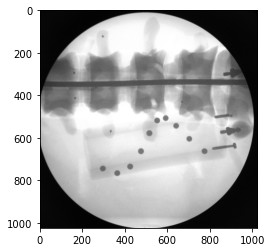

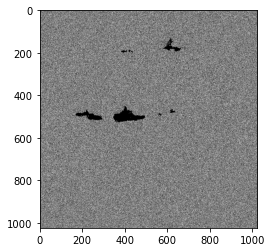

In [2]:
from Imadjust_python import *

In [3]:
IM3_out.shape


(1024, 1024)

## UNIT16 TO UNIT8 CONVERSION

In [4]:
#uint16 to unit8 conversion
im1 = cv.convertScaleAbs(IM3_out, alpha=(255.0/65535.0))

## SIMPLE BLOB DETECTION

70


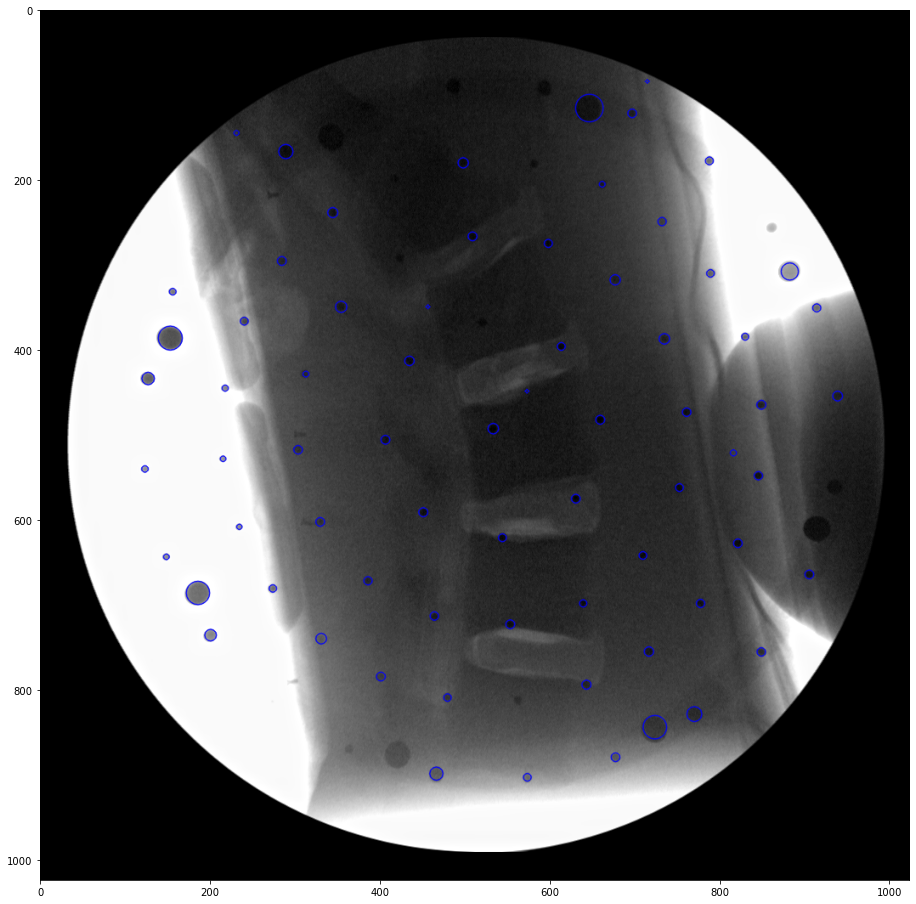

In [5]:
#GEEKSFORGEEKS METHOD:
params = cv.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 1
params.maxThreshold = 200

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 13
 
# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.3
 
# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.8
     
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.03


# using intensity value as parameter (0.5 or 0.7) 
params.filterByColor = True
params.blobColor = 0

# Create a detector with the parameters
detector = cv.SimpleBlobDetector_create(params)
     
# Detect blobs
keypoints = detector.detect(im1)
 
# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv.drawKeypoints(im1, keypoints, blank, (0, 0, 255),cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
number_of_blobs = len(keypoints)
print(number_of_blobs)
plt.figure(figsize = (16,16))
plt.imshow(blobs,'gray')


## MSER METHOD OF BLOB DETECTION

In [18]:
import random as rng
mser = cv.MSER_create(delta = 1,min_area = 50,max_area = 1000)
regions, _ = mser.detectRegions(im1)
hull_list = []
for i in range(len(regions)):
    hull = cv.convexHull(regions[i])
    hull_list.append(hull)
#drawing = np.zeros((im1.shape[0], im1.shape[1], 3), dtype=np.uint8)
#drawing = im1.copy()
#for i in range(len(regions)):
#    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#    cv.drawContours(drawing, regions, i, color)
#    cv.drawContours(drawing, hull_list, i, color)
blank = np.zeros((1, 1))
for i in range(len(regions)):
    blobs = cv.drawKeypoints(im1, regions, blank, (0, 0, 255),cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (9,9))
plt.imshow(blobs)
plt.show()

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'drawKeypoints'
> Overload resolution failed:
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type
>  - Can't parse 'keypoints'. Sequence item with index 0 has a wrong type


In [ ]:
clc

# MASKING

## MASKING FOR IM3

In [ ]:
mask_IM3 = np.zeros(IM3.shape[:2], dtype="uint8")
cv.circle(mask_IM3, (512, 512), 480, 255, -1)
plt.figure(figsize=(10,10))
plt.imshow(mask_IM3,'gray')
plt.show()
# apply our mask -- notice how only the person in the image is
# cropped out
masked_IM3 = cv.bitwise_and(IM3, IM3, mask=mask_IM3)
plt.figure(figsize=(10,10))
plt.imshow(masked_IM3,'gray')
plt.show()

## MASKING FOR IM1_1

In [ ]:
plt.imshow(img1_1_adjusted,'gray')

In [ ]:
mask_img1_1 = np.zeros(img1_1_adjusted.shape[:2], dtype="uint8")
cv.circle(mask_img1_1, (512, 512), 480, 255, -1)
plt.figure(figsize=(10,10))
plt.imshow(mask_img1_1,'gray')
plt.show()
# apply our mask -- notice how only the person in the image is
# cropped out
masked_img1_1 = cv.bitwise_and(img1_1_adjusted, img1_1_adjusted, mask=mask_img1_1)
plt.figure(figsize=(10,10))
plt.imshow(masked_img1_1,'gray')
plt.show()

# Canny Edge Detection in OpenCV

Observing difference between normal image and masked image

In [ ]:
#uint16 to unit8 conversion
i3 = cv.convertScaleAbs(IM3, alpha=(255.0/65535.0))
m3 = cv.convertScaleAbs(masked_IM3, alpha=(255.0/65535.0))
i1 = cv.convertScaleAbs(img1_1, alpha=(255.0/65535.0))
m1 = cv.convertScaleAbs(masked_img1_1, alpha=(255.0/65535.0))


In [ ]:
edgesIM3_1 = cv.Canny(i3,90,150)
edgesIM3_2 = cv.Canny(m3,90,150)
edgesimg1_1_1 = cv.Canny(i1,90,150)
edgesimg1_1_2 = cv.Canny(m1,90,150)

In [ ]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(20,20))
ax1.set_title('Original Image')
ax1.imshow(IM3,cmap = 'gray')
ax2.set_title('Edge Image')
ax2.imshow(edgesIM3_1,cmap = 'gray')
ax3.set_title('Original Image')
ax3.imshow(masked_IM3,cmap = 'gray')
ax4.set_title('Edge Image')
ax4.imshow(edgesIM3_2,cmap = 'gray')
plt.show()

In [ ]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(20,20))
ax1.set_title('Original Image')
ax1.imshow(img1_1,cmap = 'gray')
ax2.set_title('Edge Image')
ax2.imshow(edgesimg1_1_1,cmap = 'gray')
ax3.set_title('Original Image')
ax3.imshow(masked_img1_1,cmap = 'gray')
ax4.set_title('Edge Image')
ax4.imshow(edgesimg1_1_2,cmap = 'gray')
plt.show()